<a href="https://colab.research.google.com/github/janzeteachesit/colab-for-school/blob/master/Covid_19_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the COVID-19
## Imports

In [0]:
import pandas as pd

In [0]:
from matplotlib import pyplot as plt

## Loading Data

In [0]:
url = 'http://cowid.netlify.com/data/full_data.csv'

In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv(url, parse_dates=['date'], date_parser=dateparse)

In [32]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


## Adding a "Days" column

In [33]:
df['date'] - df['date'].min()

0      35 days
1      36 days
2      37 days
3      38 days
4      39 days
         ...  
2862   52 days
2863   53 days
2864   54 days
2865   55 days
2866   56 days
Name: date, Length: 2867, dtype: timedelta64[ns]

In [0]:
df['days'] = df['date'] - df['date'].min()

## Picking only countries of interest


In [0]:
dfs = df[df['location'].isin(['Canada', 'China'])]

## Getting the total cases per country



In [0]:
df_total_cases_all_countries = dfs[['location', 'days', 'total_cases']].groupby(['location', 'days']).sum().unstack('location')['total_cases']

In [37]:
df_total_cases_all_countries

location,Canada,China
days,,
0 days,NaN,278.0
1 days,NaN,310.0
2 days,NaN,574.0
3 days,NaN,835.0
4 days,NaN,1297.0
5 days,NaN,1985.0
6 days,1.0,2761.0
7 days,2.0,4537.0
8 days,3.0,5997.0


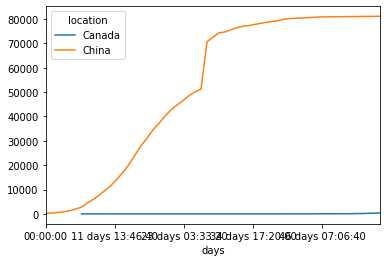

In [38]:
df_total_cases_all_countries.plot()

## Looking at Worldwide Data


In [0]:
dfWW = df[df['location'] == 'Worldwide'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

In [40]:
dfWW.plot()

TypeError: ignored

## Looking at China Data


In [0]:
dfCh = df[df['location'] == 'China'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

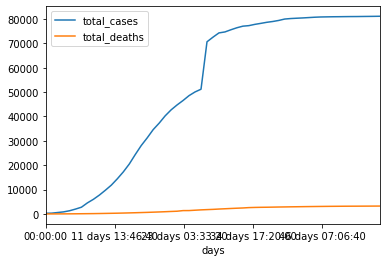

In [42]:
dfCh.plot()

## Looking at Canada Data


In [0]:
dfCA = df[df['location'] == 'Canada'][['days', 'total_cases', 'total_deaths']].groupby('days').sum()

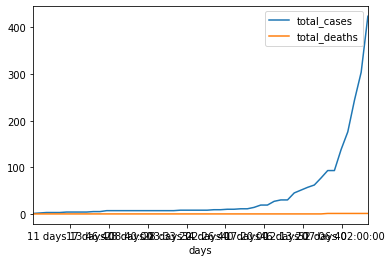

In [44]:
dfCA.plot()